# Lecture 9: Continuous Random Variables and Their Distributions
***

In this notebook we'll get some more practice working with continuous random variables, their probability density functions, and their cumulative distribution functions.  Additionally, we'll see how we can sample from some continuous distributions using Python and explore the relationship between these samples and their associated densities. 

We'll need Numpy, Matplotlib, and possibly Pandas for this notebook, so let's load them. 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

### Exercise 1 - Waiting For Buses 
*** 

Rhonda, arriving at a bus stop, just misses the bus.  Suppose that she decides to walk if the next bus takes longer than 5 minutes to arrive. Suppose also that the time in minutes between arrivals of buses at the bus stop is a continuous random variable with a $U(4,7)$ distribution. Let $X$ be the time that Rhonda will wait. 

**Part A**: What is the probability that $X$ is less than $4\frac{1}{2}$ minutes? 

**Part B**: What is the probability that $X$ is exactly 5 minutes? 

**Part C**: What is the probability that Rhonda ends up walking?  Try to formulate this problem in terms of the pdf and/or cdf of $X$.

$P( X > 5) = \int_5^7 f(x) d x = \int_5^7 \frac{1}{3} d x = \frac{2}{3}$

### Exercise 2 - Darts and Probabilities 
*** 

Suppose you are throwing darts at a dart board of radius $R$. Let $X$ be a random variable that measures the distance between the center of the dart board and the place that your dart lands.  Suppose that you're passable at darts, so you never miss the board entirely.    

**Part A**: Based on the assumptions above, and some common sense, what are the values that the random variable $X$ can take on? 

$0\le X \le R$ because getting closer than the center is impossible and missing is also apparantly impossible

**Part B**: Consider the cumulative distribution function $F(x)$ for the scenario above.  First, convince yourself that the following are true: 

$$
F(x) = P(X \leq x) = 0 \textrm{ for } x < 0 
\quad \textrm{and} \quad 
F(x) = P(X \leq x) = 1 \textrm{ for } x > R 
$$

Now, we need to define the distribution function for the $x$'s on the actual dart board.  Suppose that the probability of hitting _within_ a particular distance $x$ from the center is proportional to the area of the board from the center to the edge of a ring of radius $x$.  Based on this assumption, write down the definition of $F(x)$ for $0 \leq x \leq R$. 

$$F(x) = k \pi x^2 = \frac{1}{\pi R^2} \pi x^2 = \frac{x^2}{R^2}$$
This takes advantage of the known quantity $F(R)=1$.

**Part C**: Use the cumulative distribution function $F(x)$ you found in **Part B** to define the probability density function $f(x)$ for the random variable $X$. 

$$f(x) = \frac{d}{dx} F(x) = \frac{d}{dx}\frac{x^2}{R^2} = \frac{2x}{R^2}$$

**Part D**: Compute the probability that your dart lands within half the radius of the dart board (i.e. $0 \leq X \leq \frac{R}{2}$) as well as the probability that your dart lands outside of half the radius of the dart board (i.e. $\frac{R}{2} < X \leq R$.)

$$P(0\lt X \lt \frac{R}{2}) = \frac{1}{4}$$
equivalently,
$$P(\frac{R}{2} \lt X \lt R) = 1-\frac{1}{4} = \frac{3}{4}$$

**Part E**: Finally, find the distance away from the center such that $50%$ of all darts will land within this distance.  Or, said another way, find the $50$th percentile of the distribution of $X$.   

$$P(x_{50}) = 0.5 = \frac{x_{50}^2}{R^2} \rightarrow x_{50} = \sqrt{0.5 R^2} = \frac{R}{\sqrt{2}}$$

### Exercise 3 - Sampling the Normal Distribution 
*** 

Let's first explore the normal distribution [here](https://academo.org/demos/gaussian-distribution/). Experiment with changing the parameters. What are the effects of:
- changing $\mu$?
- changing $\sigma$?

Recall that the PDF of a normal distribution is:

$$P(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{1}{2}\left(\frac{x-\mu}{\sigma} \right)^2}$$

- Why is it important that $\sigma$ is in two places in this density function?

In [8]:
np.random.normal(1,2)

-1.7818139046553054

**Part A**: Write a function pdf_normal that takes in a Numpy array of $x$-values and the parameters $\mu$ and $\sigma$ and returns a numpy array representing the density function of the normal distribution evaluated at the specified $x$-values. 

Obviously, you could use Scipy's norm.pdf function, but the point here is to practice writing functions and working with these distributions by hand, yourself, without hiding all the fun science within canned routines and blackbox functions. It will make you **tough**, and that's the whole point, really.

In [16]:
def pdf_normal(x, mu, sig):
    return 1/( np.sqrt(sig*(2*np.pi)) ) * np.exp(-1/2*( (x-mu)/sig )**2)

a = np.array(range(10))/10

b = pdf_normal(a, 0.5, 1)

print(b)

[0.35206533 0.36827014 0.38138782 0.39104269 0.39695255 0.39894228
 0.39695255 0.39104269 0.38138782 0.36827014]


**Part B**: We can sample from a normal distribution using Numpy's [random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html#numpy.random.normal) function. Take a look at the docs, then write a function called compare_normal_sample_pdf that draws many samples from a normal distribution with the specified parameters and plots a density histogram of the samples overlaid by a plot of the density function you constructed in **Part A**.  Experiment with the number of samples as well as the histogram bin size.  How good of an approximation is the histogram to the true density function for varying numbers of samples and varying parameters of the normal distribution?  

In [22]:
def compare_normal_sample_pdf(mu, sig, num_samples=int(1e3)):
    z = pd.Series(
        np.random.normal(mu, sig, size=num_samples)
    )
    fig,ax = plt.subplots(figsize=(12,6))
    z.hist(ax=ax,density=True,color="gray",bins=30, edgecolor = "white")
    
    
    
    return 


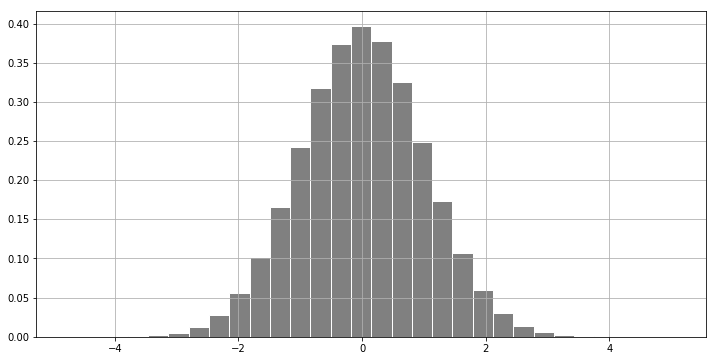

In [26]:
compare_normal_sample_pdf(0,1,int(1e6));

### Exercise 4 - Sampling the Exponential Distributions 
*** 

**Part A**: Write a function pdf_exp that takes as inputs a Numpy array of $x$-values and the rate parameter $\lambda$ and returns a Numpy array of the exponential distribution density function sampled at the $x$-values. 

Again, the point is not whether or not you can call a blackbox function in Scipy, but rather that you can implement the pdf for the exponential distribution by hand.

In [ ]:
def pdf_exp(x, lam):
    
    return 

**Part B**: We can sample from an exponential distribution using Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function. If you read the docs, you'll notice that random.exponential takes as it's input the so-called scale parameter $\beta$ which is defined to be the inverse of the rate parameter $\lambda$.  

Write a function called compare_exp_sample_pdf that draws many samples from an exponential distribution with the specified parameter and plots a density histogram of the samples overlaid by a plot of the density function you constructed in **Part A**.  Experiment with the number of samples as well as the histogram bin size.  How good of an approximation is the histogram to the true density function for varying numbers of samples and varying parameters of the exponential distribution?  

In [ ]:
def compare_exp_sample_pdf(lam, num_samples=int(1e3)):
    
    return 